We are interested in forecasting future complaints for individual officers with a 
 general forecasting model. We predict some of the features we will use to be the 
 ones previously highlighted above, such as area of patrol, prior number of 
 complaints, officer type, among others. This would be done with a forecasting 
 model where the output is some likelihood of an officer having a future complaint 
 filed against them within the timestep we select.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
officers = pd.read_csv("vis_1_data.csv")
officers = officers.rename({'?column?': 'age', '?column?.1': 'years_of_service'}, axis=1)
officers

,id,gender,race,age,years_of_service,first_name,last_name,allegation_count,sustained_count,current_salary
0,8138,M,Black,60.0,36,Glenn,Evans,132,12,125190.0
1,31631,M,White,59.0,34,Adam,Zelitzky,121,9,111474.0
2,29033,M,White,63.0,28,Jerome,Turbyville,117,4,93354.0
3,2015,M,White,61.0,31,Eugene,Bikulcius,102,3,107988.0
4,3897,M,White,52.0,27,Thomas,Carey,100,3,93354.0
...,...,...,...,...,...,...,...,...,...,...
11523,20064,F,Black,38.0,12,Loreal,Murphy,0,0,84054.0
11524,1197,M,White,37.0,8,Matthew,Balles,0,0,80016.0
11525,20663,M,White,36.0,8,Spiros,Noutsis,0,0,80016.0
11526,17072,F,Hispanic,43.0,9,Jamie,Maldonado,0,0,80016.0


In [5]:
ids = pd.read_csv("cpdb_public_data_officerallegation.csv")
ids

,officer_id,allegation_id
0,13617,C132885
1,23618,C149900
2,3049,C151502
3,5124,C152222
4,5383,C157296
...,...,...
249783,12001,1081167
249784,10321,1081169
249785,26802,1081170
249786,27962,1081170


In [6]:
years = pd.read_csv("Result_19.csv")
years

,extract,crid
0,1996.0,C227980
1,2006.0,1001892
2,2007.0,1002393
3,2007.0,1003121
4,1996.0,C228609
...,...,...
216047,2015.0,1075991
216048,2015.0,1075979
216049,2015.0,1076090
216050,2015.0,1076114


In [7]:
df = ids.merge(years, how= 'left', left_on= 'allegation_id', right_on='crid')
df = df[df['extract'].notna()].drop('crid', axis=1)
df

,officer_id,allegation_id,extract
0,13617,C132885,1983.0
1,23618,C149900,1986.0
2,3049,C151502,1986.0
3,5124,C152222,1986.0
4,5383,C157296,1987.0
...,...,...,...
249783,12001,1081167,2016.0
249784,10321,1081169,2016.0
249785,26802,1081170,2014.0
249786,27962,1081170,2014.0


In [8]:
df2 = officers.merge(df, how = 'left', 
                     left_on = 'id', 
                     right_on = 'officer_id').drop({'officer_id',
                                                    'sustained_count', 
                                                    'first_name', 
                                                    'last_name', 
                                                    'allegation_id'}, axis=1).fillna(9999)
df2 = df2[df2['extract']>1988]
a=df2.groupby(['extract','id'], as_index=False).size()
df2 = df2.merge(a, how='left', left_on=['extract','id'], right_on=['extract','id']).drop_duplicates()
temp= df2.iloc[:,[0,-2,-1]]
df2 = df2.drop({'extract','size'},axis=1)
df2 = df2.drop_duplicates()
df2

,id,gender,race,age,years_of_service,allegation_count,current_salary
0,8138,M,Black,60.0,36,132,125190.0
131,31631,M,White,59.0,34,121,111474.0
252,29033,M,White,63.0,28,117,93354.0
369,2015,M,White,61.0,31,102,107988.0
471,3897,M,White,52.0,27,100,93354.0
...,...,...,...,...,...,...,...
127747,20064,F,Black,38.0,12,0,84054.0
127748,1197,M,White,37.0,8,0,80016.0
127749,20663,M,White,36.0,8,0,80016.0
127750,17072,F,Hispanic,43.0,9,0,80016.0


In [34]:
temp['key'] = temp["id"].astype(str) + " " + temp["extract"].astype(int).astype(str)
mydict = dict(zip(temp.key, temp['size']))
keys = set(temp['id'])

In [40]:
d = {}
for k in keys:
  temp_d = {}
  for i in range(1989,2019):
    try:
      str_k = str(k) + " " + str(i)
      temp_d[i] = mydict[str_k]
    except:
      pass
  d[k] = temp_d

d

{1: {2005: 1, 2007: 1, 2010: 1, 2012: 1, 2013: 1, 2016: 1},
 2: {2007: 1, 2009: 2, 2010: 2, 2011: 3},
 7: {1998: 3, 2004: 2, 2007: 1, 2010: 1, 2016: 1},
 15: {2014: 1},
 16: {2008: 1, 2009: 4, 2010: 8, 2011: 3, 2012: 3},
 18: {2002: 1, 2003: 2, 2004: 2},
 23: {},
 25: {2014: 1},
 28: {},
 30: {},
 34: {1999: 1,
  2000: 2,
  2002: 2,
  2003: 1,
  2004: 5,
  2007: 1,
  2012: 1,
  2015: 1,
  2017: 1},
 36: {},
 37: {},
 38: {2000: 4, 2001: 2, 2002: 2, 2003: 4, 2004: 1},
 40: {},
 41: {2006: 1, 2007: 2, 2011: 2},
 42: {2002: 1, 2003: 4, 2007: 1, 2008: 1, 2010: 1, 2012: 1, 2013: 2, 2014: 1},
 44: {1996: 1,
  1997: 3,
  1998: 4,
  1999: 4,
  2000: 2,
  2001: 1,
  2002: 1,
  2006: 1,
  2007: 1,
  2008: 1,
  2010: 1},
 46: {2017: 1},
 47: {2001: 1, 2004: 1, 2005: 2, 2008: 1, 2011: 1, 2018: 1},
 49: {2007: 1, 2008: 1, 2009: 2, 2010: 1, 2012: 2},
 50: {2006: 2},
 51: {2005: 1, 2006: 1, 2008: 1, 2009: 2, 2012: 2, 2017: 1},
 52: {1999: 2,
  2003: 3,
  2004: 1,
  2005: 2,
  2006: 2,
  2007: 3,
  20

In [39]:
temp.loc[temp['id'] == 1]


,id,extract,size,key
116286,1,2007.0,1,1 2007
116287,1,2010.0,1,1 2010
116288,1,2012.0,1,1 2012
116289,1,2013.0,1,1 2013
116290,1,2016.0,1,1 2016
116291,1,2005.0,1,1 2005


In [41]:
for i in range(1989,2019):
  df2[i]=0

df2 = df2.sort_values(['id'])
df2

,id,gender,race,age,years_of_service,allegation_count,current_salary,1989,1990,1991,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
116286,1,M,White,51.0,17,6,101442.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106670,2,F,Hispanic,42.0,17,8,94122.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110008,7,M,White,50.0,27,8,93354.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126061,15,M,White,39.0,10,1,84054.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65278,16,M,Asian/Pacific,38.0,14,19,84054.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114127,31782,M,White,38.0,15,6,84054.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126234,31783,M,White,32.0,6,1,72510.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127152,31786,F,White,42.0,6,0,72510.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105437,31788,M,White,48.0,20,9,87006.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
for i in range(1989,2019):
  col = []
  for k in sorted(keys):
    try:
      col.append(d[k][i])
    except:
      col.append(0)
  df2[i] = col

In [45]:
df2

,id,gender,race,age,years_of_service,allegation_count,current_salary,1989,1990,1991,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
116286,1,M,White,51.0,17,6,101442.0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
106670,2,F,Hispanic,42.0,17,8,94122.0,0,0,0,...,2,2,3,0,0,0,0,0,0,0
110008,7,M,White,50.0,27,8,93354.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
126061,15,M,White,39.0,10,1,84054.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
65278,16,M,Asian/Pacific,38.0,14,19,84054.0,0,0,0,...,4,8,3,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114127,31782,M,White,38.0,15,6,84054.0,0,0,0,...,0,0,1,0,2,0,1,0,0,0
126234,31783,M,White,32.0,6,1,72510.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
127152,31786,F,White,42.0,6,0,72510.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105437,31788,M,White,48.0,20,9,87006.0,0,0,0,...,0,2,0,0,0,0,0,0,1,0


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df2['race'] = LabelEncoder().fit_transform(df2['race'])
df2['gender'] = LabelEncoder().fit_transform(df2['gender'])
train, test = train_test_split(df2, test_size=0.2)

In [101]:
train

,id,gender,race,age,years_of_service,allegation_count,current_salary,1989,1990,1991,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
112986,27509,1,5,50.0,20,7,87006.0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
116442,16923,0,5,62.0,33,6,95106.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
123393,14275,1,5,60.0,28,3,93354.0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
105518,22234,1,2,42.0,17,9,87006.0,0,0,0,...,1,3,0,0,0,0,0,0,1,0
50471,20798,1,5,43.0,20,24,87006.0,0,0,0,...,4,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126151,18444,1,5,40.0,12,1,84054.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
127678,10265,1,2,40.0,9,0,80016.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124550,29385,1,5,37.0,9,2,84054.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
126576,31146,1,5,41.0,8,0,76266.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X_train = train.drop([2018, 'id'], axis=1)
x_test = test.drop([2018, 'id'], axis=1)
Y_train = train[2018]
y_test = test[2018]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy: 0.9605377276669558
F1 Score: 0.326623903266239


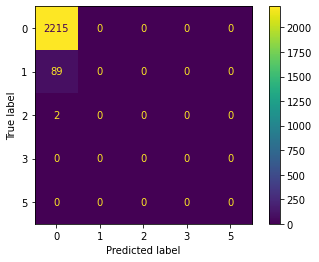

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.metrics import f1_score
clf = svm.SVC()
clf.fit(X_train, Y_train)
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
print("Accuracy: " + str(clf.score(x_test, y_test)))
print("F1 Score: " + str(f1_score(y_pred, y_test, average="macro")))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59776db190>]],
      dtype=object)

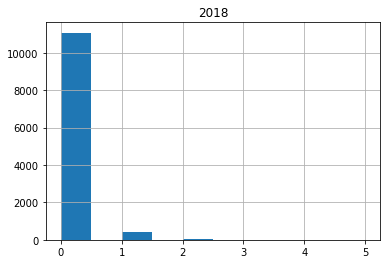

In [54]:
df2.hist(column=2018)

# New Section



```
# This is formatted as code
```



In [67]:
allegation_df = pd.read_csv("data_allegation_false.csv")
officer_df = pd.read_csv("officer.csv")
victim_df = pd.read_csv("ml_victim.csv")
allegation_to_officer = pd.read_csv("ml_officer_allegation.csv")

In [68]:
allegation_df

,crid,beat_id
0,C227980,NaN
1,1001892,NaN
2,1002393,265.0
3,1003121,NaN
4,C228609,NaN
...,...,...
202603,1075991,276.0
202604,1075979,146.0
202605,1076090,67.0
202606,1076114,60.0


In [69]:
officer_df

,id,civilian_allegation_percentile,honorable_mention_percentile,internal_allegation_percentile,trr_percentile,allegation_count,sustained_count,civilian_compliment_count,race,gender
0,32312,65.6966,62.9589,0.0000,63.0035,10.0,0.0,7.0,White,M
1,32358,88.5838,86.4605,0.0000,67.9110,24.0,0.0,6.0,White,M
2,32480,0.0000,33.1953,0.0000,0.0000,0.0,0.0,4.0,White,M
3,32491,0.0000,51.4927,0.0000,0.0000,0.0,0.0,4.0,White,M
4,2680,NaN,0.0000,NaN,NaN,0.0,0.0,0.0,White,M
...,...,...,...,...,...,...,...,...,...,...
35540,32098,29.7987,53.4366,0.0000,49.1036,8.0,0.0,35.0,White,M
35541,25962,97.9005,72.3629,96.4875,0.0000,31.0,3.0,0.0,White,M
35542,25503,97.8772,85.2153,79.9133,75.2071,44.0,1.0,2.0,White,M
35543,25732,83.7403,56.9460,88.3297,38.9028,24.0,1.0,2.0,White,M


In [70]:
victim_df

,allegation_id,gender,race
0,1063914,F,Black
1,1064663,F,Black
2,1064287,F,Black
3,1065356,M,Black
4,1065181,F,Black
...,...,...,...
126503,1063419,M,Black
126504,1063427,M,Black
126505,1063425,M,Black
126506,1063422,F,Black


In [71]:
victim_df = victim_df.dropna()
victim_df

,allegation_id,gender,race
0,1063914,F,Black
1,1064663,F,Black
2,1064287,F,Black
3,1065356,M,Black
4,1065181,F,Black
...,...,...,...
126503,1063419,M,Black
126504,1063427,M,Black
126505,1063425,M,Black
126506,1063422,F,Black


In [72]:
allegation_df = allegation_df.fillna(-1)
allegation_df['beat_id'] = pd.to_numeric(allegation_df['beat_id'])
allegation_df = allegation_df[pd.to_numeric(allegation_df['crid'], errors='coerce').notnull()]
allegation_df['crid'] = pd.to_numeric(allegation_df['crid'])
allegation_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,crid,beat_id
1,1001892,-1.0
2,1002393,265.0
3,1003121,-1.0
5,1003534,-1.0
6,1012534,-1.0
...,...,...
202603,1075991,276.0
202604,1075979,146.0
202605,1076090,67.0
202606,1076114,60.0


In [73]:
victim_df_with_beats = pd.merge(victim_df, allegation_df, left_on = 'allegation_id', right_on = 'crid', how='left')
victim_df_with_beats

,allegation_id,gender,race,crid,beat_id
0,1063914,F,Black,1063914.0,72.0
1,1064663,F,Black,1064663.0,64.0
2,1064287,F,Black,1064287.0,213.0
3,1065356,M,Black,1065356.0,86.0
4,1065181,F,Black,1065181.0,-1.0
...,...,...,...,...,...
117307,1063419,M,Black,1063419.0,38.0
117308,1063427,M,Black,1063427.0,235.0
117309,1063425,M,Black,1063425.0,249.0
117310,1063422,F,Black,1063422.0,245.0


In [74]:
df = victim_df_with_beats
df[df.isna().any(axis=1)]

,allegation_id,gender,race,crid,beat_id
21,1086200,M,Black,NaN,NaN
41,1029918,F,Black,NaN,NaN
53,1033759,M,White,NaN,NaN
68,1057671,F,Black,NaN,NaN
172,1063407,M,White,NaN,NaN
...,...,...,...,...,...
117208,1031830,M,Hispanic,NaN,NaN
117255,1061494,M,Hispanic,NaN,NaN
117274,1061255,F,Black,NaN,NaN
117291,1062331,M,White,NaN,NaN


In [75]:
victim_df_with_beats = victim_df_with_beats.dropna()

In [76]:
allegation_to_officer
allegation_to_officer = allegation_to_officer[pd.to_numeric(allegation_to_officer['allegation_id'], errors='coerce').notnull()]
allegation_to_officer['allegation_id'] = pd.to_numeric(allegation_to_officer['allegation_id'])
allegation_to_officer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,allegation_id,officer_id
6,1085148,23718
7,1088021,8556
8,1088673,14712
9,1088873,23404
10,1005033,13606
...,...,...
249783,1081167,12001
249784,1081169,10321
249785,1081170,26802
249786,1081170,27962


In [77]:
victim_df_with_beats_officers = pd.merge(victim_df_with_beats, allegation_to_officer, left_on = 'allegation_id', right_on = 'allegation_id', how='left')
victim_df_with_beats_officers.officer_id.astype("category")
victim_df_with_beats_officers = victim_df_with_beats_officers.drop("crid", axis=1)
victim_df_with_beats_officers


,allegation_id,gender,race,beat_id,officer_id
0,1063914,F,Black,72.0,814.0
1,1064663,F,Black,64.0,13873.0
2,1064287,F,Black,213.0,NaN
3,1065356,M,Black,86.0,5646.0
4,1065181,F,Black,-1.0,NaN
...,...,...,...,...,...
171380,1063427,M,Black,235.0,NaN
171381,1063425,M,Black,249.0,1436.0
171382,1063422,F,Black,245.0,NaN
171383,1063423,M,Hispanic,150.0,16533.0


In [78]:
df = victim_df_with_beats_officers
officers_present = df.groupby(['allegation_id', 'officer_id'],as_index=False).size()
officers_present

,allegation_id,officer_id,size
0,1000002,16669.0,2
1,1000002,24673.0,2
2,1000006,26358.0,2
3,1000006,31997.0,2
4,1000007,24457.0,1
...,...,...,...
57756,1089998,20237.0,3
57757,1090030,10257.0,2
57758,1090030,13273.0,2
57759,1090030,16664.0,2


In [79]:
victim_df_with_beats_officers = victim_df_with_beats_officers.dropna()
victim_df_with_beats_officers

,allegation_id,gender,race,beat_id,officer_id
0,1063914,F,Black,72.0,814.0
1,1064663,F,Black,64.0,13873.0
3,1065356,M,Black,86.0,5646.0
6,1070806,M,Black,269.0,22074.0
7,1074576,M,Black,225.0,6765.0
...,...,...,...,...,...
171376,1063415,M,Black,102.0,883.0
171377,1063415,M,Black,102.0,10894.0
171381,1063425,M,Black,249.0,1436.0
171383,1063423,M,Hispanic,150.0,16533.0


In [80]:
t_df = pd.merge(victim_df_with_beats_officers, officers_present.drop('officer_id',axis=1), on="allegation_id", how='left').drop_duplicates()
t_df

,allegation_id,gender,race,beat_id,officer_id,size
0,1063914,F,Black,72.0,814.0,2
1,1064663,F,Black,64.0,13873.0,8
2,1065356,M,Black,86.0,5646.0,4
3,1070806,M,Black,269.0,22074.0,2
4,1074576,M,Black,225.0,6765.0,2
...,...,...,...,...,...,...
478156,1062321,M,Black,42.0,18022.0,1
478158,1063413,M,Black,145.0,21779.0,1
478160,1063413,M,Black,145.0,28301.0,1
478172,1063423,M,Hispanic,150.0,16533.0,1


In [81]:
officer_df

,id,civilian_allegation_percentile,honorable_mention_percentile,internal_allegation_percentile,trr_percentile,allegation_count,sustained_count,civilian_compliment_count,race,gender
0,32312,65.6966,62.9589,0.0000,63.0035,10.0,0.0,7.0,White,M
1,32358,88.5838,86.4605,0.0000,67.9110,24.0,0.0,6.0,White,M
2,32480,0.0000,33.1953,0.0000,0.0000,0.0,0.0,4.0,White,M
3,32491,0.0000,51.4927,0.0000,0.0000,0.0,0.0,4.0,White,M
4,2680,NaN,0.0000,NaN,NaN,0.0,0.0,0.0,White,M
...,...,...,...,...,...,...,...,...,...,...
35540,32098,29.7987,53.4366,0.0000,49.1036,8.0,0.0,35.0,White,M
35541,25962,97.9005,72.3629,96.4875,0.0000,31.0,3.0,0.0,White,M
35542,25503,97.8772,85.2153,79.9133,75.2071,44.0,1.0,2.0,White,M
35543,25732,83.7403,56.9460,88.3297,38.9028,24.0,1.0,2.0,White,M


In [82]:
officer_df = officer_df[officer_df['race'].notna()]
officer_df = officer_df[officer_df['gender'].notna()]
officer_df = officer_df.fillna(-1)
officer_df

,id,civilian_allegation_percentile,honorable_mention_percentile,internal_allegation_percentile,trr_percentile,allegation_count,sustained_count,civilian_compliment_count,race,gender
0,32312,65.6966,62.9589,0.0000,63.0035,10.0,0.0,7.0,White,M
1,32358,88.5838,86.4605,0.0000,67.9110,24.0,0.0,6.0,White,M
2,32480,0.0000,33.1953,0.0000,0.0000,0.0,0.0,4.0,White,M
3,32491,0.0000,51.4927,0.0000,0.0000,0.0,0.0,4.0,White,M
4,2680,-1.0000,0.0000,-1.0000,-1.0000,0.0,0.0,0.0,White,M
...,...,...,...,...,...,...,...,...,...,...
35540,32098,29.7987,53.4366,0.0000,49.1036,8.0,0.0,35.0,White,M
35541,25962,97.9005,72.3629,96.4875,0.0000,31.0,3.0,0.0,White,M
35542,25503,97.8772,85.2153,79.9133,75.2071,44.0,1.0,2.0,White,M
35543,25732,83.7403,56.9460,88.3297,38.9028,24.0,1.0,2.0,White,M


In [83]:
final_df = pd.merge(t_df, officer_df, left_on = 'officer_id', right_on = 'id', how='left')
final_df

,allegation_id,gender_x,race_x,beat_id,officer_id,size,id,civilian_allegation_percentile,honorable_mention_percentile,internal_allegation_percentile,trr_percentile,allegation_count,sustained_count,civilian_compliment_count,race_y,gender_y
0,1063914,F,Black,72.0,814.0,2,814,29.7987,44.4968,0.0000,0.0000,6.0,0.0,31.0,White,M
1,1064663,F,Black,64.0,13873.0,8,13873,95.3060,81.9776,0.0000,99.8525,22.0,0.0,3.0,Black,M
2,1065356,M,Black,86.0,5646.0,4,5646,85.1455,46.7833,61.1521,49.1036,19.0,1.0,5.0,Black,M
3,1070806,M,Black,269.0,22074.0,2,22074,86.3763,78.5717,61.1521,56.6663,19.0,0.0,17.0,Hispanic,M
4,1074576,M,Black,225.0,6765.0,2,6765,94.5635,99.8965,72.9171,89.1183,25.0,0.0,12.0,White,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63479,1062321,M,Black,42.0,18022.0,1,18022,69.1001,76.9221,61.1521,49.1036,12.0,1.0,6.0,White,M
63480,1063413,M,Black,145.0,21779.0,1,21779,82.9729,92.4087,97.5633,84.9030,18.0,5.0,2.0,White,M
63481,1063413,M,Black,145.0,28301.0,1,28301,84.7518,93.6475,0.0000,99.3759,9.0,0.0,2.0,White,M
63482,1063423,M,Hispanic,150.0,16533.0,1,16533,69.0203,97.0599,0.0000,86.5313,7.0,0.0,3.0,Hispanic,M


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
final_df['gender_x'] = LabelEncoder().fit_transform(final_df['gender_x'])
final_df['race_x'] = LabelEncoder().fit_transform(final_df['race_x'])
final_df['gender_y'] = LabelEncoder().fit_transform(final_df['gender_y'])
final_df['race_y'] = LabelEncoder().fit_transform(final_df['race_y'])
train, test = train_test_split(final_df, test_size=0.2)

In [108]:
train

,allegation_id,gender_x,race_x,beat_id,officer_id,size,id,civilian_allegation_percentile,honorable_mention_percentile,internal_allegation_percentile,trr_percentile,allegation_count,sustained_count,civilian_compliment_count,race_y,gender_y
31601,1018764,0,1,204.0,22627.0,2,22627,78.8320,83.9473,0.0000,60.5583,10.0,0.0,2.0,1,1
6380,1070003,0,4,177.0,20589.0,1,20589,65.0737,81.5215,0.0000,56.6663,8.0,0.0,4.0,5,1
24952,1008046,1,1,95.0,24784.0,2,24784,77.7405,86.8495,0.0000,88.8089,11.0,1.0,5.0,1,1
4044,1068131,0,1,256.0,23171.0,2,23171,78.9067,99.8803,0.0000,86.0377,9.0,1.0,3.0,5,1
37769,1024652,1,1,-1.0,31962.0,2,31962,93.8609,96.4712,85.3249,89.1183,26.0,1.0,2.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1066133,0,4,105.0,22692.0,4,22692,90.4873,84.3711,79.9133,56.6663,27.0,1.0,5.0,5,1
24854,1007010,1,1,226.0,393.0,1,393,77.6460,84.5425,0.0000,72.1094,14.0,0.0,3.0,5,1
8716,1073421,1,1,203.0,12337.0,2,12337,51.2159,96.8496,0.0000,0.0000,1.0,0.0,1.0,5,1
51850,1042047,1,1,125.0,3605.0,4,3605,99.7160,99.4793,87.9958,94.6783,54.0,2.0,8.0,5,1


In [109]:
test

,allegation_id,gender_x,race_x,beat_id,officer_id,size,id,civilian_allegation_percentile,honorable_mention_percentile,internal_allegation_percentile,trr_percentile,allegation_count,sustained_count,civilian_compliment_count,race_y,gender_y
41566,1029651,1,1,249.0,22824.0,1,22824,90.9358,88.9317,0.0000,75.2071,18.0,0.0,7.0,5,1
51976,1043011,1,1,81.0,28871.0,1,28871,97.1646,88.9931,85.0558,63.0035,35.0,0.0,7.0,5,1
21225,1003530,0,4,46.0,21437.0,1,21437,47.6380,71.5399,0.0000,75.2071,6.0,0.0,6.0,2,0
17239,1087466,1,2,72.0,26414.0,2,26414,77.6460,76.4790,97.8822,90.1509,22.0,3.0,12.0,1,1
3651,1066839,0,4,42.0,14201.0,2,14201,44.6781,82.5015,0.0000,87.7908,4.0,0.0,2.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43323,1031310,0,4,113.0,12146.0,4,12146,95.0419,86.0756,79.9133,90.1509,32.0,1.0,2.0,5,1
24014,1006101,0,4,26.0,25963.0,1,25963,99.3373,75.9356,79.9133,95.6655,73.0,5.0,19.0,5,1
17992,1010716,1,1,250.0,1464.0,4,1464,79.7738,82.4627,61.1521,75.2071,15.0,0.0,3.0,5,1
32653,1019626,1,1,273.0,31641.0,3,31641,53.0197,72.7755,0.0000,38.9028,23.0,2.0,2.0,5,1


In [110]:
x_train = train.drop(['allegation_id', 'race_x'], axis=1)
x_test = test.drop(['allegation_id', 'race_x'], axis=1)
x_train

,gender_x,beat_id,officer_id,size,id,civilian_allegation_percentile,honorable_mention_percentile,internal_allegation_percentile,trr_percentile,allegation_count,sustained_count,civilian_compliment_count,race_y,gender_y
31601,0,204.0,22627.0,2,22627,78.8320,83.9473,0.0000,60.5583,10.0,0.0,2.0,1,1
6380,0,177.0,20589.0,1,20589,65.0737,81.5215,0.0000,56.6663,8.0,0.0,4.0,5,1
24952,1,95.0,24784.0,2,24784,77.7405,86.8495,0.0000,88.8089,11.0,1.0,5.0,1,1
4044,0,256.0,23171.0,2,23171,78.9067,99.8803,0.0000,86.0377,9.0,1.0,3.0,5,1
37769,1,-1.0,31962.0,2,31962,93.8609,96.4712,85.3249,89.1183,26.0,1.0,2.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,105.0,22692.0,4,22692,90.4873,84.3711,79.9133,56.6663,27.0,1.0,5.0,5,1
24854,1,226.0,393.0,1,393,77.6460,84.5425,0.0000,72.1094,14.0,0.0,3.0,5,1
8716,1,203.0,12337.0,2,12337,51.2159,96.8496,0.0000,0.0000,1.0,0.0,1.0,5,1
51850,1,125.0,3605.0,4,3605,99.7160,99.4793,87.9958,94.6783,54.0,2.0,8.0,5,1


In [111]:
y_train = train['race_x']
y_test = test['race_x']
y_train

31601    1
6380     4
24952    1
4044     1
37769    1
        ..
2395     4
24854    1
8716     1
51850    1
27884    1
Name: race_x, Length: 50787, dtype: int64


ACCURACY OF THE MODEL:  0.7720721430259117
F1 Score OF THE MODEL:  0.34434454155596994


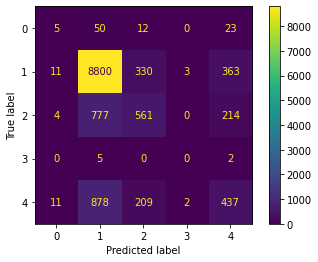

In [112]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
from sklearn import metrics 
print()
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("F1 Score OF THE MODEL: ", metrics.f1_score(y_test, y_pred, average="macro"))

In [90]:
feature_imp = pd.Series(clf.feature_importances_, index = x_train.columns).sort_values(ascending = False)
feature_imp

beat_id                           0.316797
honorable_mention_percentile      0.082966
civilian_allegation_percentile    0.073505
size                              0.072926
officer_id                        0.069638
id                                0.069270
trr_percentile                    0.060671
allegation_count                  0.059437
civilian_compliment_count         0.046538
gender_x                          0.045764
internal_allegation_percentile    0.041148
race_y                            0.026695
sustained_count                   0.025986
gender_y                          0.008660
dtype: float64

In [94]:
y_pred = clf.predict_proba(x_test)


In [95]:
y_pred

array([[0.        , 0.83      , 0.14571429, 0.        , 0.02428571],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.01      , 0.53      , 0.09      , 0.        , 0.37      ],
       ...,
       [0.        , 0.9       , 0.04      , 0.01      , 0.05      ],
       [0.        , 0.98      , 0.        , 0.        , 0.02      ],
       [0.        , 0.99      , 0.        , 0.        , 0.01      ]])